In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'Youtube_dataCleaning.ipynb', 'data.csv']


In [47]:
df = pd.read_csv("data.csv")

In [48]:
df

,Unnamed,Temperature,Humidity
0,0,1,1.0
1,1,NaN,NaN
2,2,3,31.0
3,3,4,22.0
4,4,5,33.0
5,5,6,11.0
6,6,1,21.0
7,7,N/a,24.0
8,8,9,12.0
9,9,na,32.0


In [49]:
df.isnull().sum()

Unnamed        0
Temperature    1
Humidity       1
dtype: int64

# Step 1: Detecting NA N/A and na Values

In [50]:
missing_values=["N/a", "na",np.nan]
df = pd.read_csv("data.csv", na_values=missing_values)

In [51]:
df.isnull().sum()

Unnamed        0
Temperature    3
Humidity       1
dtype: int64

In [52]:
df.isnull().any()

Unnamed        False
Temperature     True
Humidity        True
dtype: bool

<Axes: >

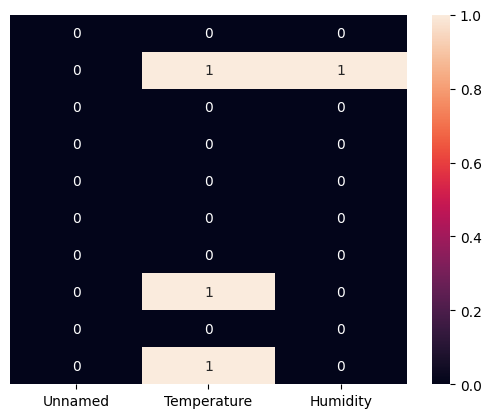

In [55]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

# Step2: Removing missing values

In [56]:
df

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,NaN,NaN
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,NaN,24.0
8,8,9.0,12.0
9,9,NaN,32.0


In [57]:
df.dropna()

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
8,8,9.0,12.0


In [68]:
df.dropna(how = "all") # if Unnamed : 1 was Nan it would have removed that row

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,NaN,NaN
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,NaN,24.0
8,8,9.0,12.0
9,9,NaN,32.0


## Fill with 0

In [61]:
df.fillna(0)

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,0.0,0.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,0.0,24.0
8,8,9.0,12.0
9,9,0.0,32.0


## Forward fill

In [63]:
df.fillna(method='ffill')

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,1.0,1.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,1.0,24.0
8,8,9.0,12.0
9,9,9.0,32.0


## Backward fill

In [64]:
df.fillna(method='bfill')

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,3.0,31.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,9.0,24.0
8,8,9.0,12.0
9,9,NaN,32.0


# Interpolition

### It's filling the gap with mean of upper and lower value

In [70]:
df.interpolate()

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,2.0,16.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,5.0,24.0
8,8,9.0,12.0
9,9,9.0,32.0


In [71]:
df

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,NaN,NaN
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,NaN,24.0
8,8,9.0,12.0
9,9,NaN,32.0


In [72]:
df_clean = df.interpolate()
df_clean

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,2.0,16.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,5.0,24.0
8,8,9.0,12.0
9,9,9.0,32.0


# Substituting values

In [75]:
df.fillna({
    'Temperature': 333, 
    'Humidity': 555
})

,Unnamed,Temperature,Humidity
0,0,1.0,1.0
1,1,333.0,555.0
2,2,3.0,31.0
3,3,4.0,22.0
4,4,5.0,33.0
5,5,6.0,11.0
6,6,1.0,21.0
7,7,333.0,24.0
8,8,9.0,12.0
9,9,333.0,32.0
